### Q1

> Make scatterplots of each dataset so you can see what they look like.

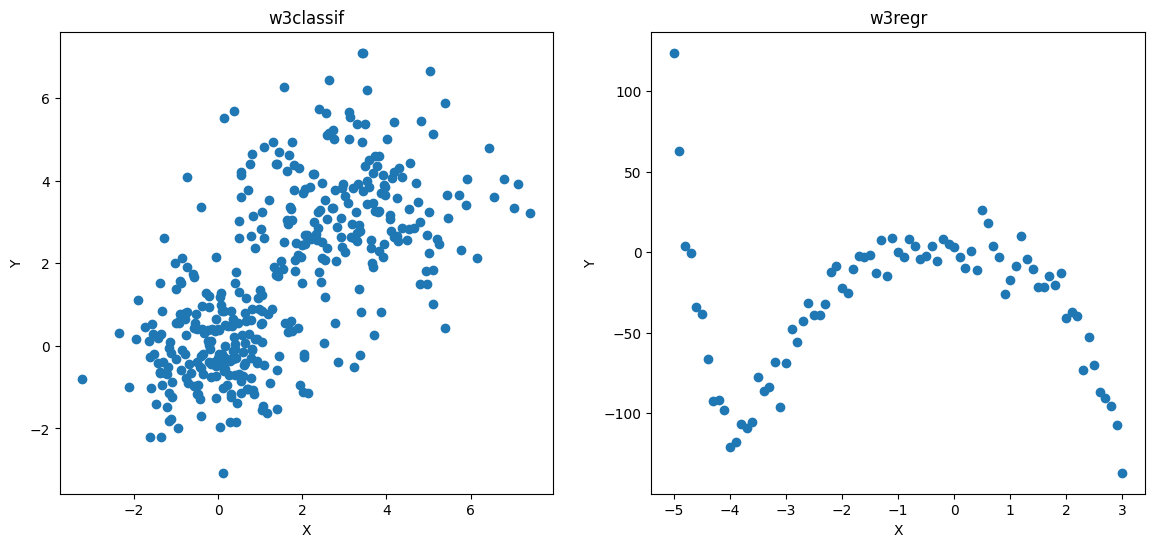

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the csv file
data1 = pd.read_csv('./w3classif.csv', header=None, names=['X', 'Y', 'label'])
data2 = pd.read_csv('./w3regr.csv', header=None, names=['X', 'Y', 'label'])

# Shuffle the dataset
data1 = data1.sample(frac=1).reset_index(drop=True)
data2 = data2.sample(frac=1).reset_index(drop=True)


# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of the data
ax1.scatter(data1['X'], data1['Y'])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('w3classif')

ax2.scatter(data2['X'], data2['Y'])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('w3regr')

# Show plot
plt.show()

### Q2

> Randomly shuffle the datasets (i.e. the order of the rows) and split them each into 70% (for training) and 30% (for testing).

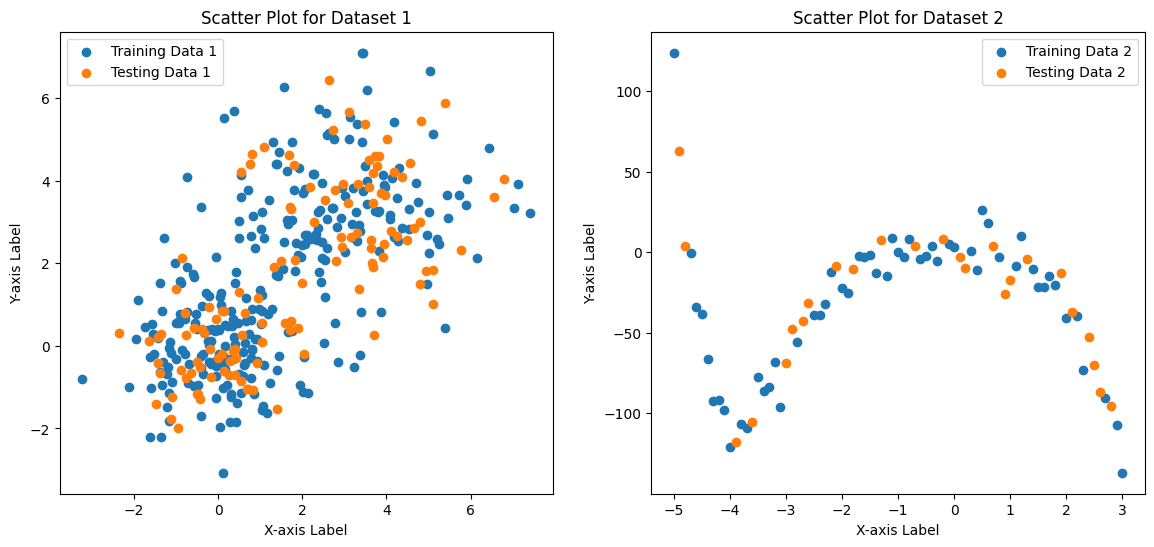

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data1 = pd.read_csv('./w3classif.csv', header=None, names=['x', 'y', 'label'])
data2 = pd.read_csv('./w3regr.csv', header=None, names=['x', 'y', 'label'])

# 随机排列数据集 / Shuffle the dataset
data1 = data1.sample(frac=1, random_state=42).reset_index(drop=True)
data2 = data2.sample(frac=1, random_state=42).reset_index(drop=True)

# 分割数据集为训练集和测试集 / Split the dataset into training and testing sets
train_size1 = int(0.7 * len(data1))
train_data1 = data1[:train_size1]
test_data1 = data1[train_size1:]

train_size2 = int(0.7 * len(data2))
train_data2 = data2[:train_size2]
test_data2 = data2[train_size2:]

# 提取训练集和测试集的x和y数据 / Extract x and y data for training and testing sets
x_train1, y_train1 = train_data1['x'], train_data1['y']
x_test1, y_test1 = test_data1['x'], test_data1['y']

x_train2, y_train2 = train_data2['x'], train_data2['y']
x_test2, y_test2 = test_data2['x'], test_data2['y']

# 创建图形和子图 / Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 创建第一个数据集的散点图 / Create scatter plot for the first dataset
ax1.scatter(x_train1, y_train1, label='Training Data 1')
ax1.scatter(x_test1, y_test1, label='Testing Data 1')
ax1.set_title('Scatter Plot for Dataset 1')
ax1.set_xlabel('X-axis Label')
ax1.set_ylabel('Y-axis Label')
ax1.legend()

# 创建第二个数据集的散点图 / Create scatter plot for the second dataset
ax2.scatter(x_train2, y_train2, label='Training Data 2')
ax2.scatter(x_test2, y_test2, label='Testing Data 2')
ax2.set_title('Scatter Plot for Dataset 2')
ax2.set_xlabel('X-axis Label')
ax2.set_ylabel('Y-axis Label')
ax2.legend()

# Show plot
plt.show()


### Q3

> (a) Build a k-NN classifier with k = 3 for dataset w3classif.csv and find the training and test loss (i.e. misclassification rate).

> (b) Plot the decision regions for your classifier together with the training and/or test data points.

> (c) Experiment with different k values and see how it affects the loss values and the decision regions.

Training Loss (Misclassification Rate): 0.0429
Test Loss (Misclassification Rate): 0.0333


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


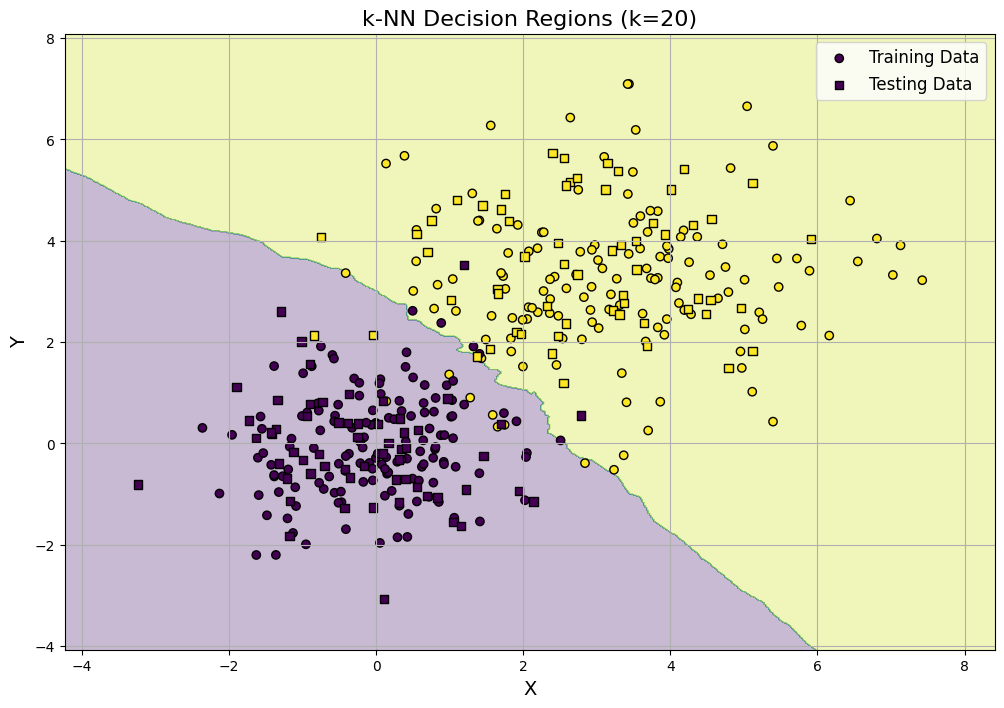

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set the value of k
n_neighbors = 3  #  You can change this value as needed

# Load the data
data = pd.read_csv('./w3classif.csv', header=None, names=['X', 'Y', 'label'])

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X', 'Y']]
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calcalate misclassification rate for training and testing sets
train_loss = 1 - accuracy_score(y_train, y_train_pred)
test_loss = 1 - accuracy_score(y_test, y_test_pred)

# Print the results
print(f'Training Loss (Misclassification Rate): {train_loss:.4f}')
print(f'Test Loss (Misclassification Rate): {test_loss:.4f}')

# Plot decision regions
h = .02  # step size in the mesh
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
plt.scatter(X_train['X'], X_train['Y'], c=y_train, edgecolor='k', marker='o', label='Training Data', cmap=plt.cm.viridis)
plt.scatter(X_test['X'], X_test['Y'], c=y_test, edgecolor='k', marker='s', label='Testing Data', cmap=plt.cm.viridis)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title(f'k-NN Decision Regions (k={n_neighbors})', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()

Comparison of multiple k values

k=1
Training Loss (Misclassification Rate): 0.0000
Test Loss (Misclassification Rate): 0.0583


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


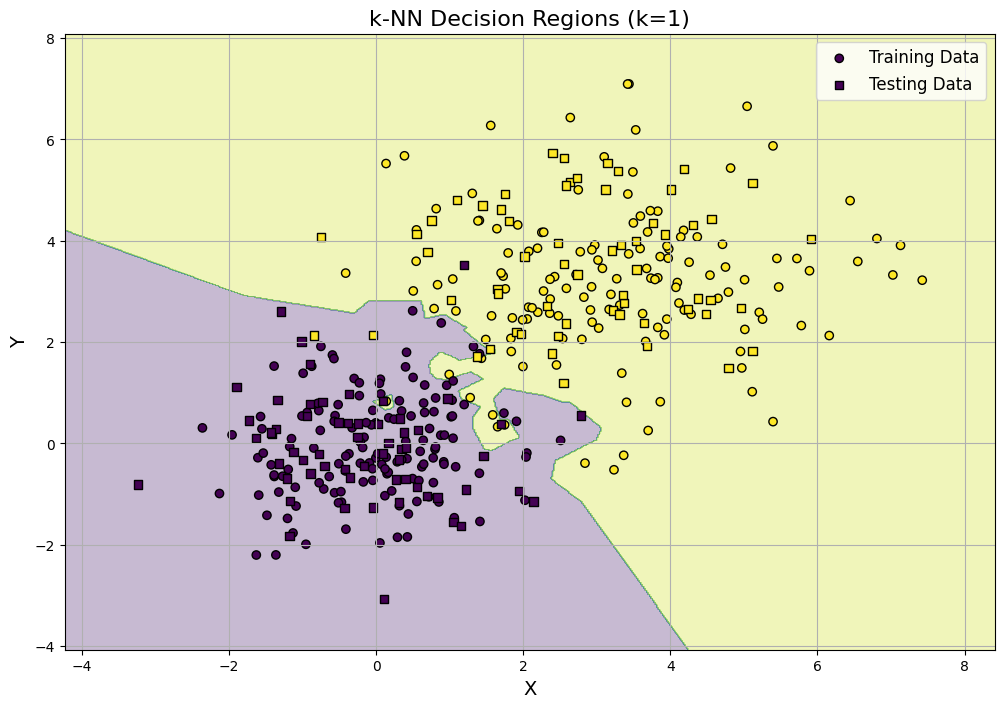

k=5
Training Loss (Misclassification Rate): 0.0286
Test Loss (Misclassification Rate): 0.0417


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


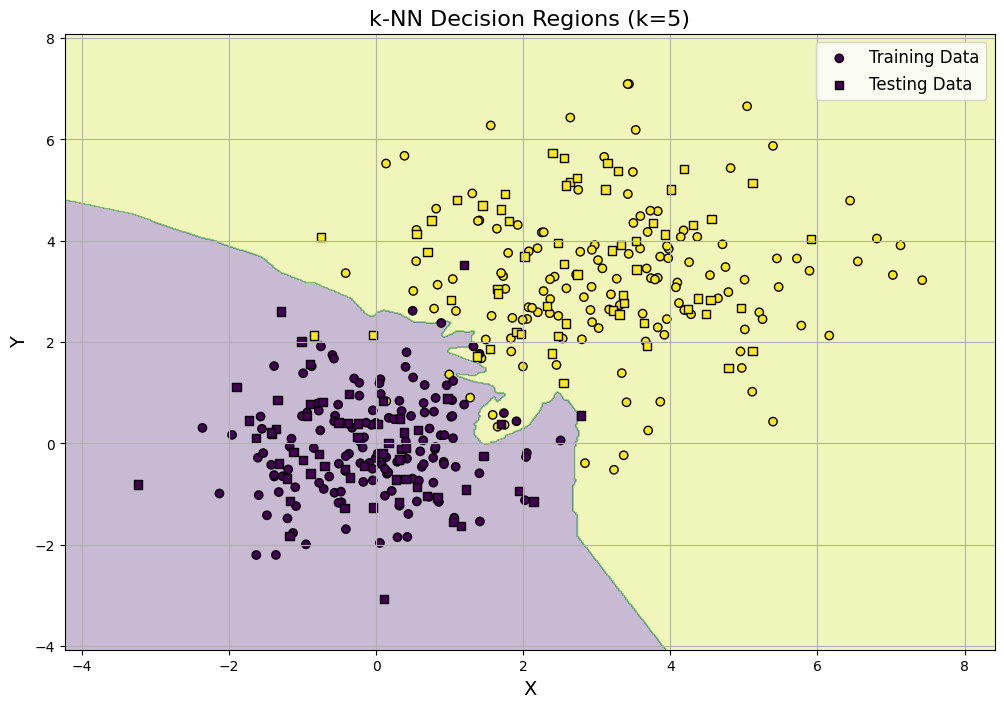

k=10
Training Loss (Misclassification Rate): 0.0393
Test Loss (Misclassification Rate): 0.0333


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


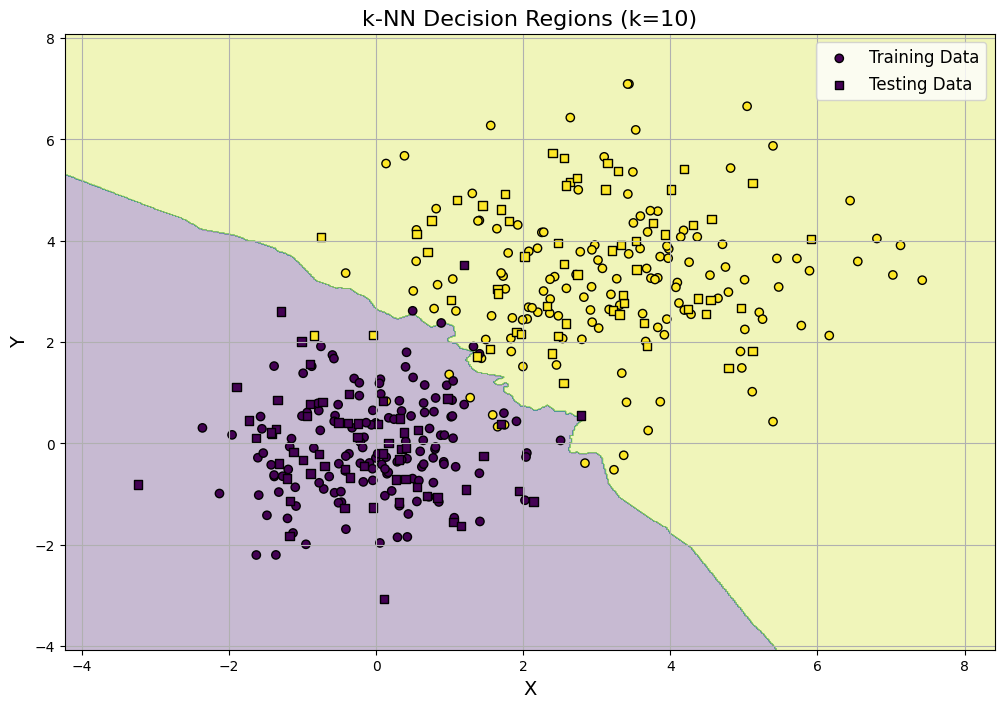

k=20
Training Loss (Misclassification Rate): 0.0429
Test Loss (Misclassification Rate): 0.0333


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


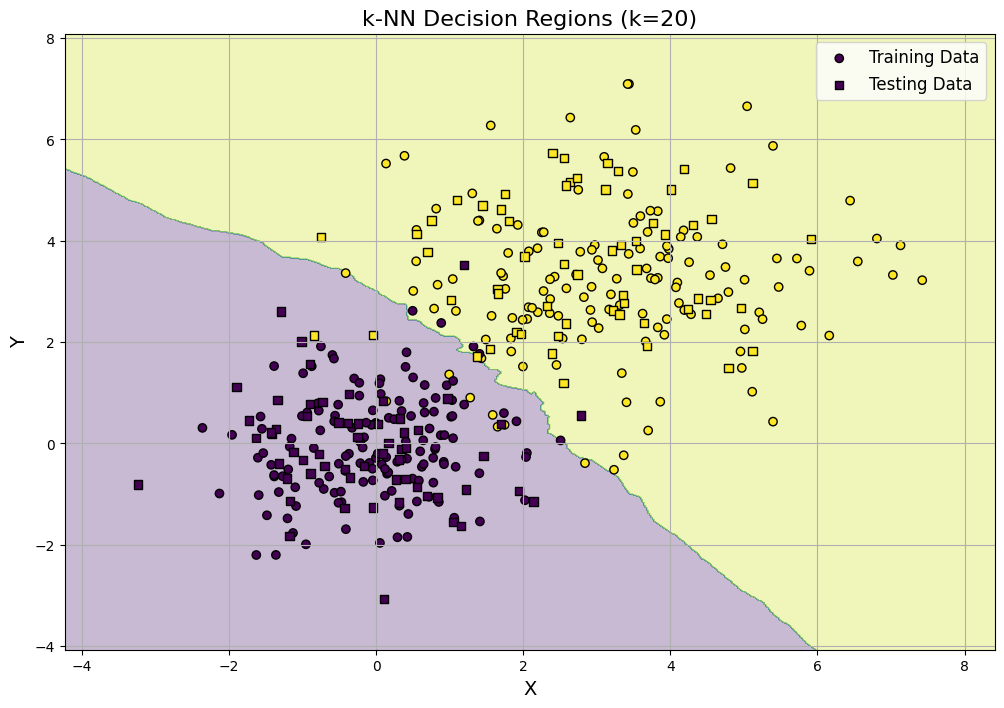

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 设置不同的k值数组 / Set the array of different k values
k_values = [1, 5, 10, 20]

# 读取数据集 / Load the data
data = pd.read_csv('./w3classif.csv', header=None, names=['X', 'Y', 'label'])

# 随机排列数据集 / Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# 分割数据集为特征和标签 / Split the dataset into features and labels
X = data[['X', 'Y']]
y = data['label']

# 分割数据集为训练集和测试集 / Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 循环遍历不同的k值 / Loop through different k values
for n_neighbors in k_values:
    # 创建k-NN分类器 / Create k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # 训练分类器 / Train the classifier
    knn.fit(X_train, y_train)

    # 预测训练集和测试集 / Predict on training and testing sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # 计算训练集和测试集的误分类率 / Calculate misclassification rate for training and testing sets
    train_loss = 1 - accuracy_score(y_train, y_train_pred)
    test_loss = 1 - accuracy_score(y_test, y_test_pred)

    # 打印结果 / Print the results
    print(f'k={n_neighbors}')
    print(f'Training Loss (Misclassification Rate): {train_loss:.4f}')
    print(f'Test Loss (Misclassification Rate): {test_loss:.4f}')

    # 绘制决策区域 / Plot decision regions
    h = .02  # 网格步长 / step size in the mesh
    x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
    y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
    plt.scatter(X_train['X'], X_train['Y'], c=y_train, edgecolor='k', marker='o', label='Training Data', cmap=plt.cm.viridis)
    plt.scatter(X_test['X'], X_test['Y'], c=y_test, edgecolor='k', marker='s', label='Testing Data', cmap=plt.cm.viridis)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.title(f'k-NN Decision Regions (k={n_neighbors})', fontsize=16)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.show()

### Q4

- Build a k-NN regression model with k = 3 for dataset w3regr.csv and find the training and test loss (i.e. sum of squared error).
- Plot the training and/or test data together with the predicted “function” of the model.
- Experiment with different k values and see how it affects the loss values and the predicted function.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 读取数据集 / Load the dataset
data = pd.read_csv('./w3regr.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X']]
y = data['Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create k-NN regressor with k=3
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

# Calculate sum of squared error for training and testing sets
train_loss = mean_squared_error(y_train, y_train_pred) * len(y_train)
test_loss = mean_squared_error(y_test, y_test_pred) * len(y_test)

print(f'Training Loss (Sum of Squared Error): {train_loss:.4f}')
print(f'Test Loss (Sum of Squared Error): {test_loss:.4f}')

Training Loss (Sum of Squared Error): 7547.3328
Test Loss (Sum of Squared Error): 5690.0195


Training Loss (Sum of Squared Error): 7547.3328
Test Loss (Sum of Squared Error): 5690.0195


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


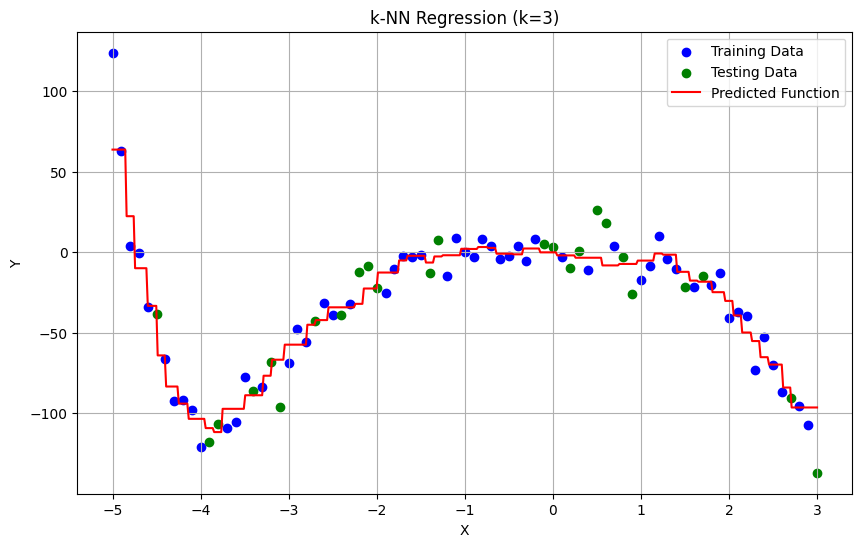

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('./w3regr.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X']]
y = data['Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the value of k
n_neighbors = 3  # You can change this value as needed

# Create k-NN regressor with k=3
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

# Calculate sum of squared error for training and testing sets
train_loss = mean_squared_error(y_train, y_train_pred) * len(y_train)
test_loss = mean_squared_error(y_test, y_test_pred) * len(y_test)

print(f'Training Loss (Sum of Squared Error): {train_loss:.4f}')
print(f'Test Loss (Sum of Squared Error): {test_loss:.4f}')

# Plot the training and test data together with the predicted function
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Plot predicted function
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = knn_regressor.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Predicted Function')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('k-NN Regression (k=3)')
plt.legend()
plt.grid(True)
plt.show()


k=1
Training Loss (Sum of Squared Error): 0.0000
Test Loss (Sum of Squared Error): 5756.2769


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


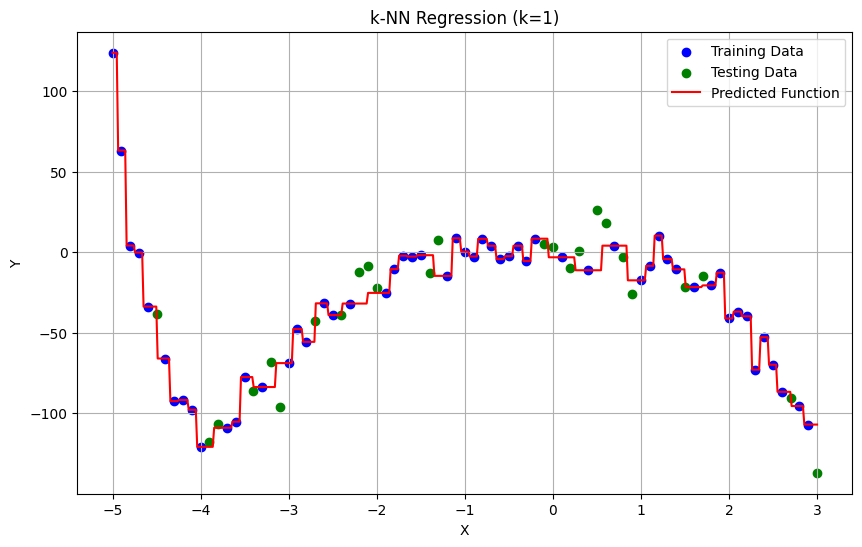

k=3
Training Loss (Sum of Squared Error): 7547.3328
Test Loss (Sum of Squared Error): 5690.0195


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


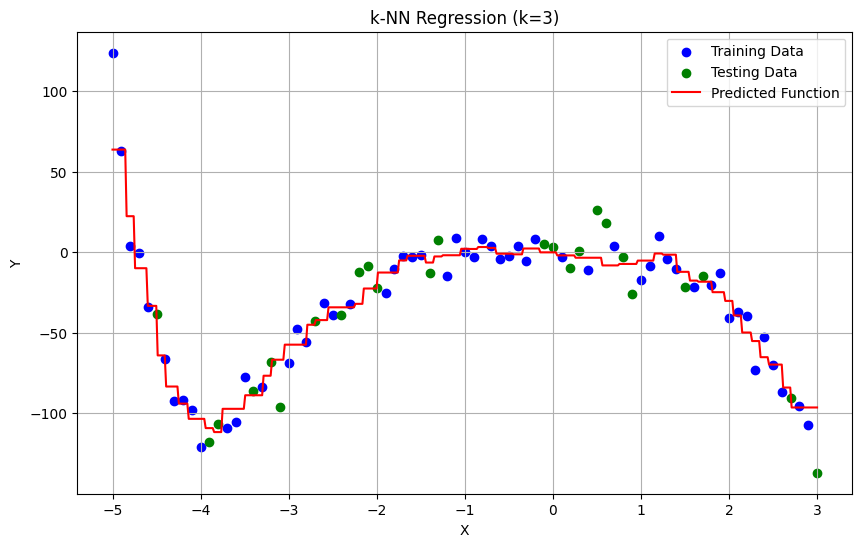

/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


k=5
Training Loss (Sum of Squared Error): 15182.4531
Test Loss (Sum of Squared Error): 7523.2666


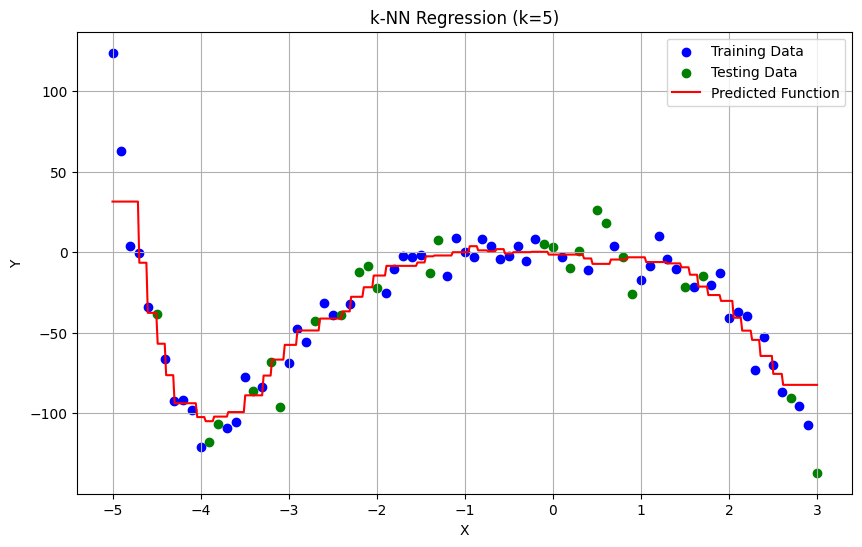

k=10
Training Loss (Sum of Squared Error): 47472.7564
Test Loss (Sum of Squared Error): 11714.7213


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


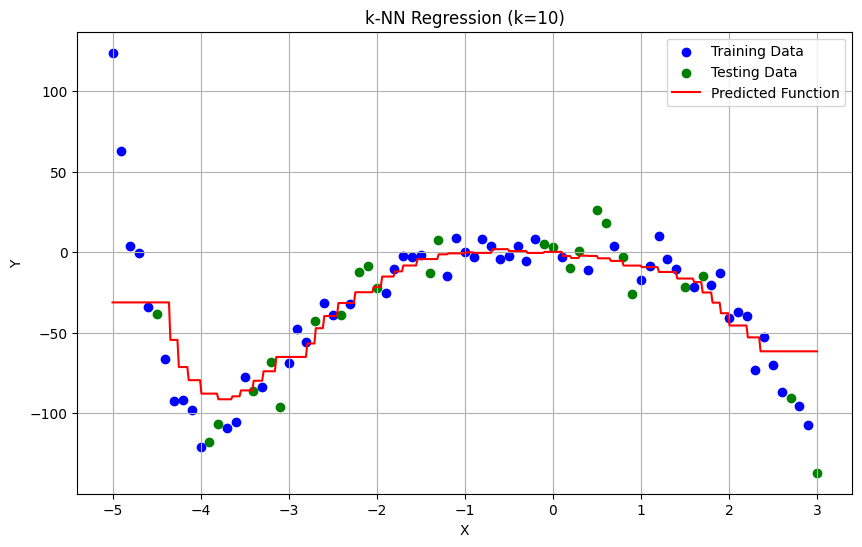

/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


k=20
Training Loss (Sum of Squared Error): 87702.6390
Test Loss (Sum of Squared Error): 28164.6789


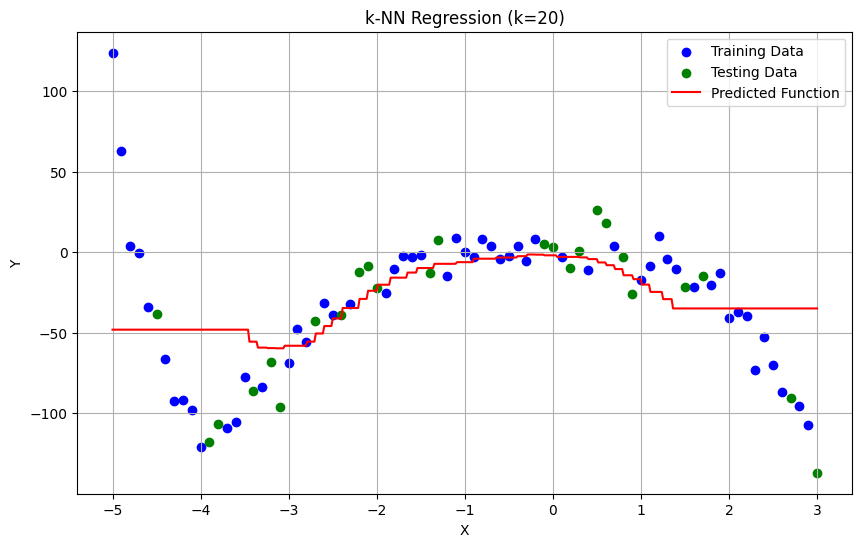

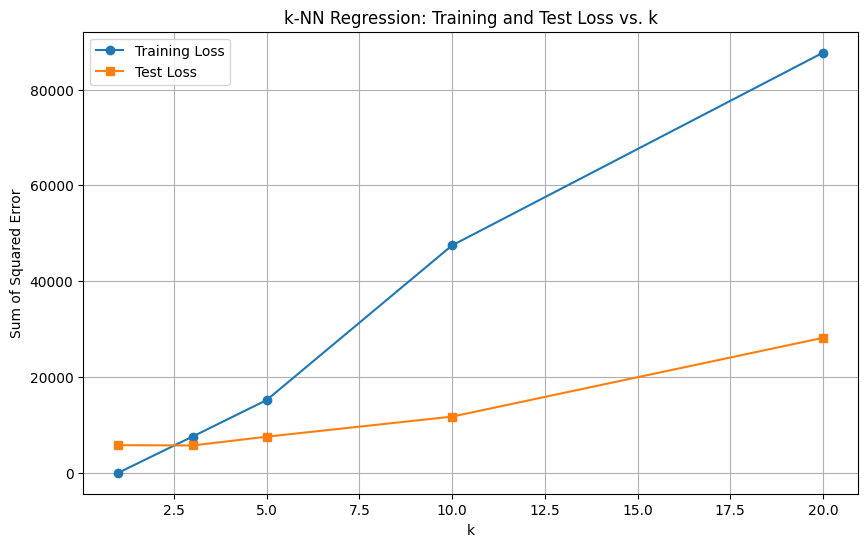

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('./w3regr.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X']]
y = data['Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different k values to experiment with
k_values = [1, 3, 5, 10, 20]

# Store the results
results = []

for k in k_values:
    # Create k-NN regressor with current k
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    # Train the regressor
    knn_regressor.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)

    # Calculate sum of squared error for training and testing sets
    train_loss = mean_squared_error(y_train, y_train_pred) * len(y_train)
    test_loss = mean_squared_error(y_test, y_test_pred) * len(y_test)

    # Store the results
    results.append((k, train_loss, test_loss))

    print(f'k={k}')
    print(f'Training Loss (Sum of Squared Error): {train_loss:.4f}')
    print(f'Test Loss (Sum of Squared Error): {test_loss:.4f}')

    # Plot the training and test data together with the predicted function
    plt.figure(figsize=(10, 6))

    # Plot training data
    plt.scatter(X_train, y_train, color='blue', label='Training Data')

    # Plot test data
    plt.scatter(X_test, y_test, color='green', label='Testing Data')

    # Plot predicted function
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_plot = knn_regressor.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red', label='Predicted Function')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'k-NN Regression (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the loss values for different k values
k_values, train_losses, test_losses = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_losses, label='Training Loss', marker='o')
plt.plot(k_values, test_losses, label='Test Loss', marker='s')
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.title('k-NN Regression: Training and Test Loss vs. k')
plt.legend()
plt.grid(True)
plt.show()

### Q5

(a) Build a decision tree classifier for dataset w3classif.csv and find the training and test loss (i.e. misclassification rate).
(b) Plot the decision regions for your classifier together with the training and/or test data points.
(c) Experiment with different maximum depth values and see how it affects the loss values and the decision regions.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('./w3classif.csv', header=None, names=['X', 'Y', 'label'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X', 'Y']]
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
tree_classifier.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

# Calculate misclassification rate for training and testing sets
train_loss = 1 - accuracy_score(y_train, y_train_pred)
test_loss = 1 - accuracy_score(y_test, y_test_pred)

print(f'Training Loss (Misclassification Rate): {train_loss:.4f}')
print(f'Test Loss (Misclassification Rate): {test_loss:.4f}')

Training Loss (Misclassification Rate): 0.0000
Test Loss (Misclassification Rate): 0.0667


Training Loss (Misclassification Rate): 0.0000
Test Loss (Misclassification Rate): 0.0667


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


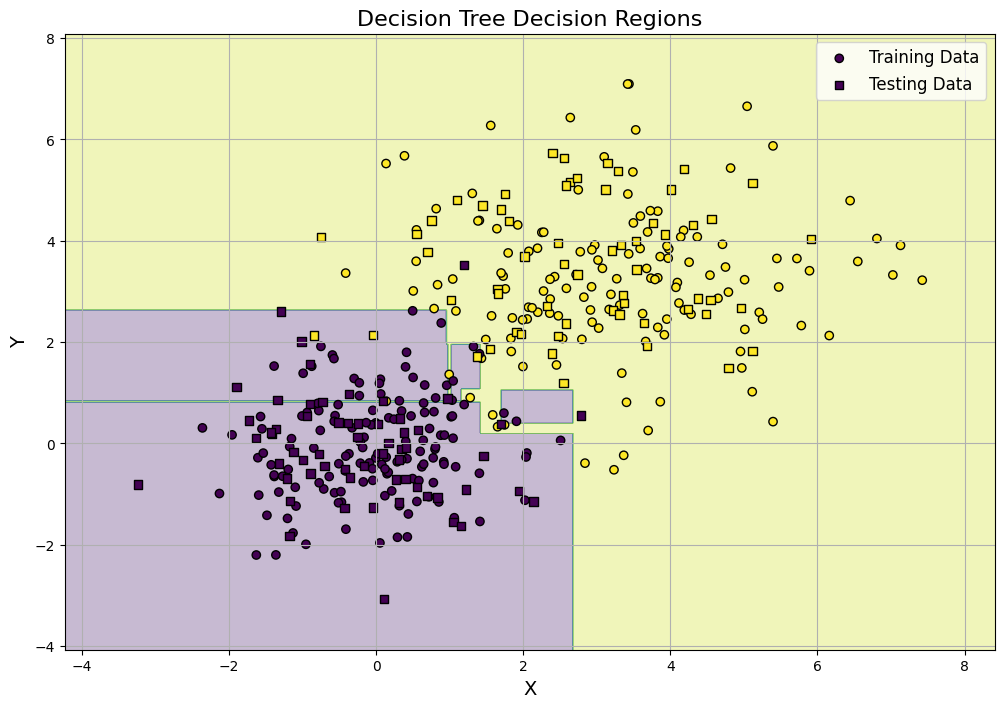

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('./w3classif.csv', header=None, names=['X', 'Y', 'label'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X', 'Y']]
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
tree_classifier.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

# Calculate misclassification rate for training and testing sets
train_loss = 1 - accuracy_score(y_train, y_train_pred)
test_loss = 1 - accuracy_score(y_test, y_test_pred)

print(f'Training Loss (Misclassification Rate): {train_loss:.4f}')
print(f'Test Loss (Misclassification Rate): {test_loss:.4f}')

# Plot decision regions
h = .02  # step size in the mesh
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
plt.scatter(X_train['X'], X_train['Y'], c=y_train, edgecolor='k', marker='o', label='Training Data', cmap=plt.cm.viridis)
plt.scatter(X_test['X'], X_test['Y'], c=y_test, edgecolor='k', marker='s', label='Testing Data', cmap=plt.cm.viridis)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Decision Tree Decision Regions', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()

max_depth=1
Training Loss (Misclassification Rate): 0.0821
Test Loss (Misclassification Rate): 0.0833


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


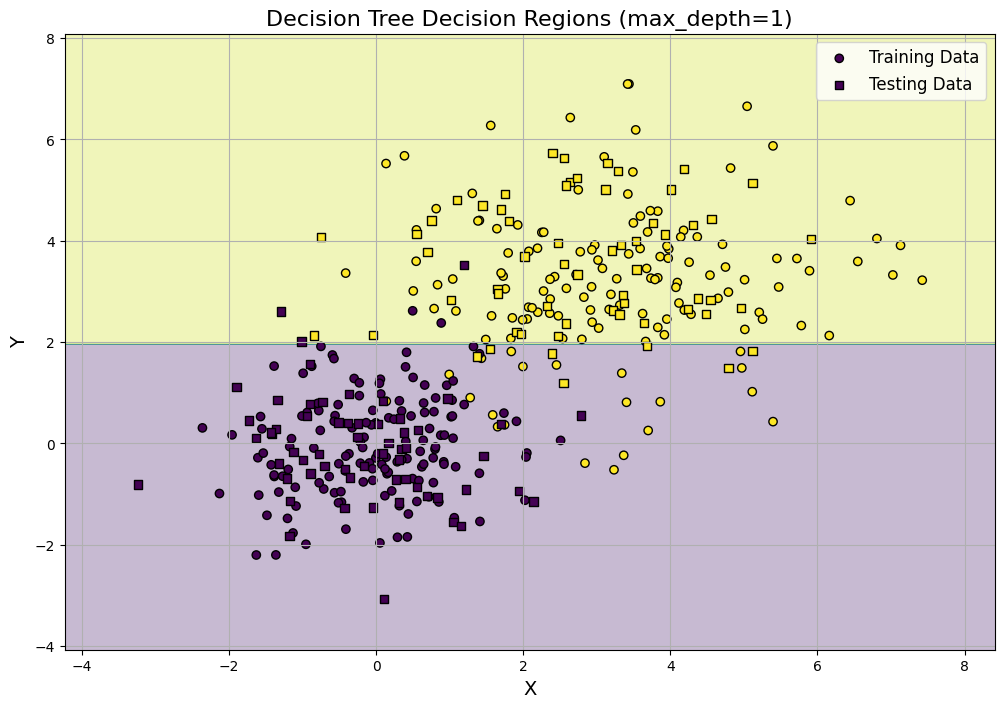

max_depth=3
Training Loss (Misclassification Rate): 0.0321
Test Loss (Misclassification Rate): 0.0750


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


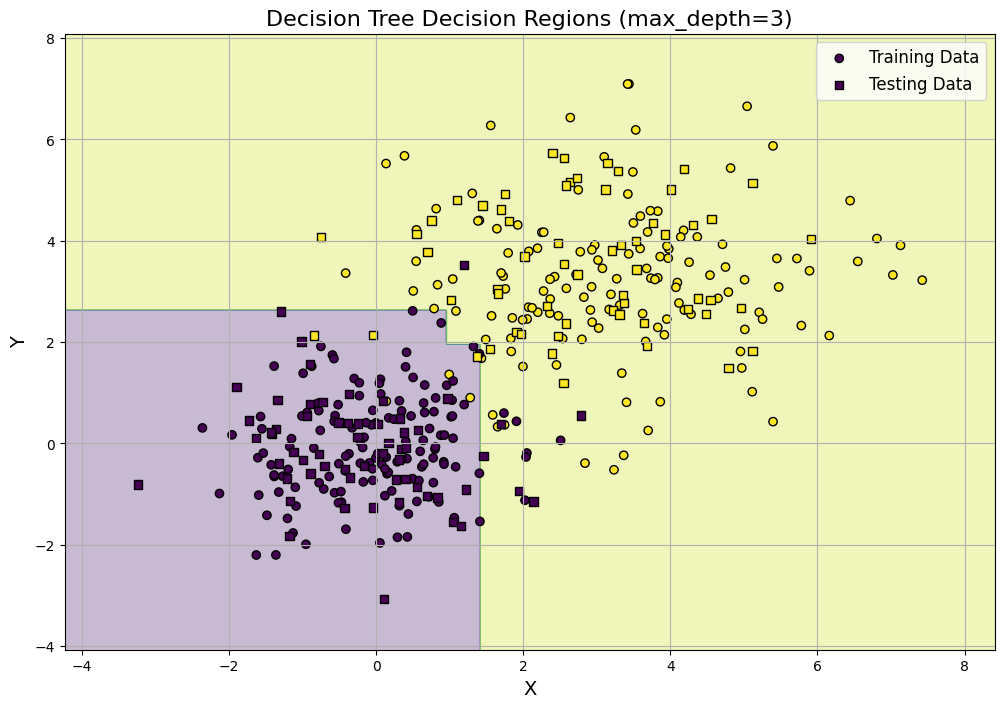

max_depth=5
Training Loss (Misclassification Rate): 0.0143
Test Loss (Misclassification Rate): 0.0667


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


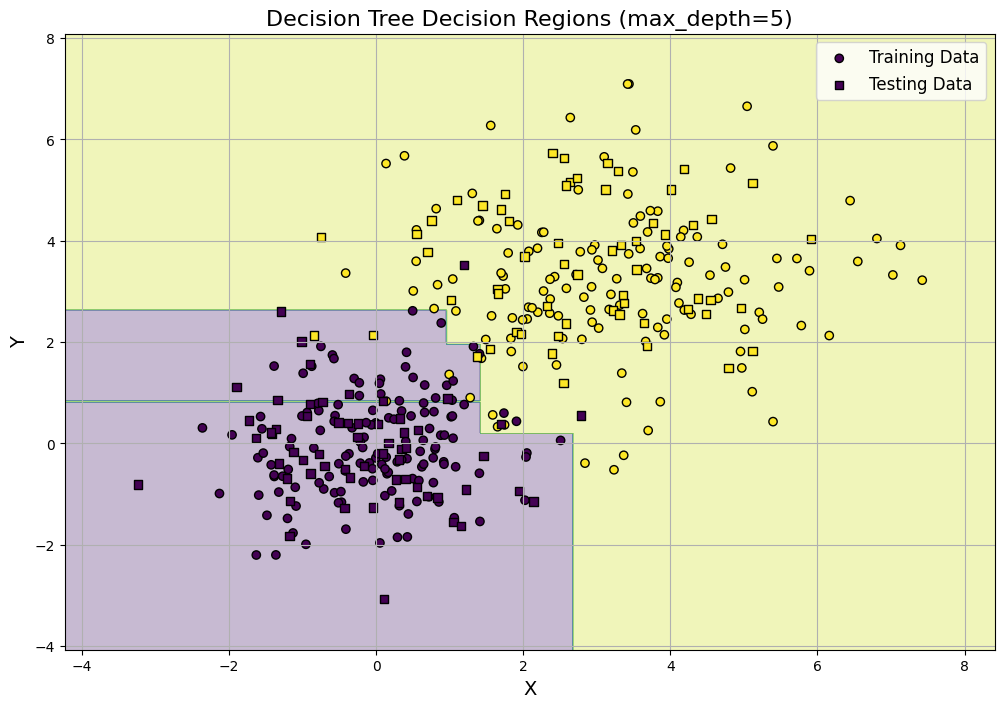

max_depth=10
Training Loss (Misclassification Rate): 0.0000
Test Loss (Misclassification Rate): 0.0667


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


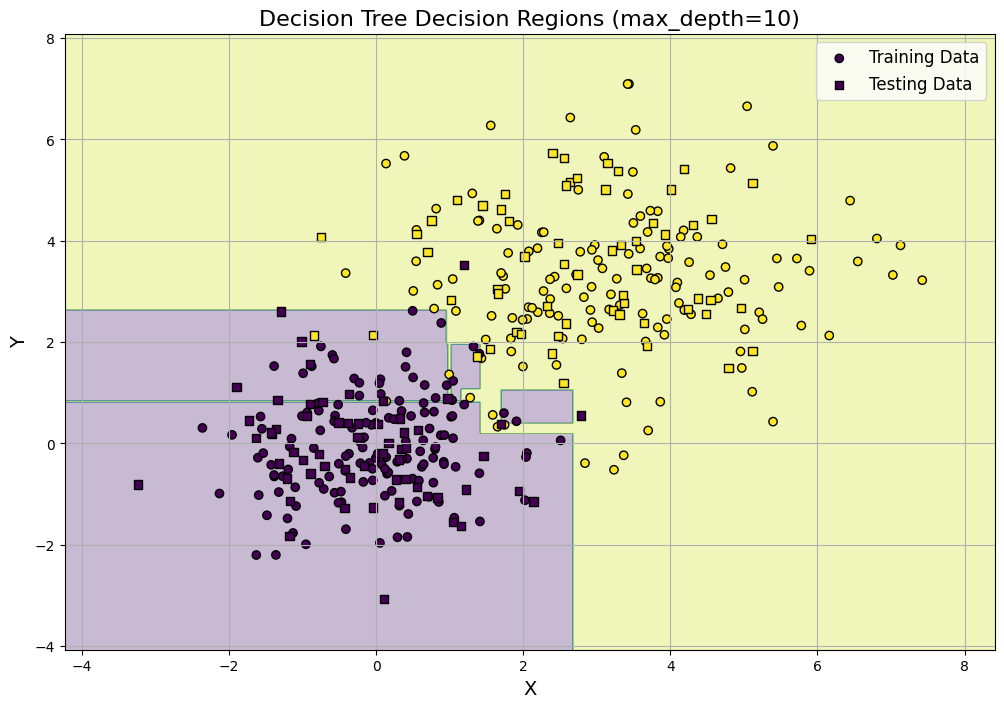

max_depth=None
Training Loss (Misclassification Rate): 0.0000
Test Loss (Misclassification Rate): 0.0667


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


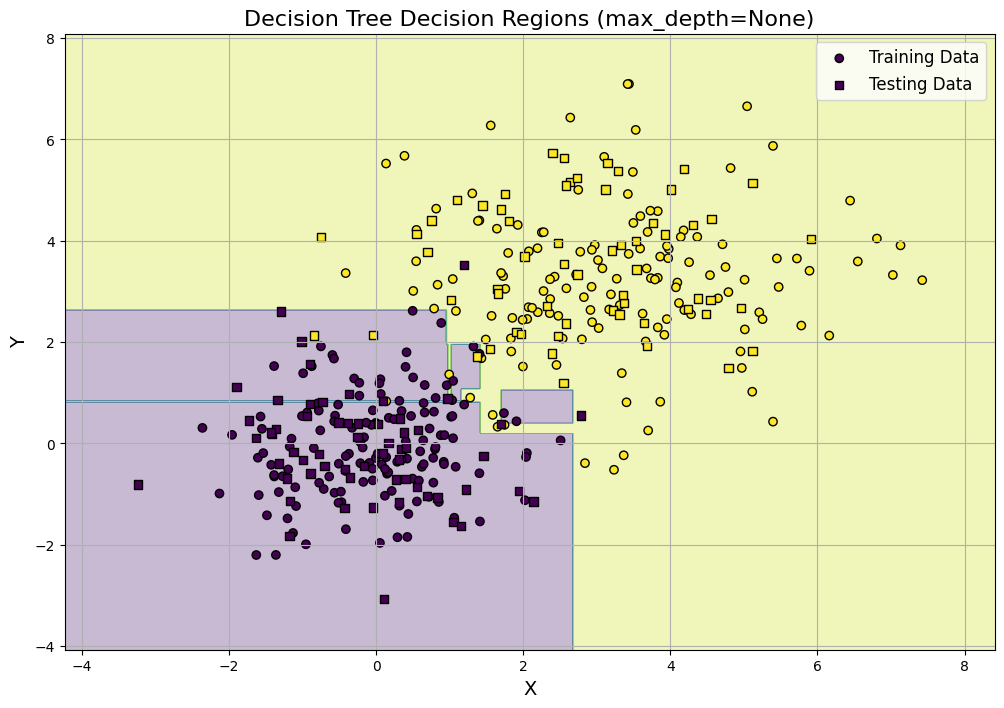

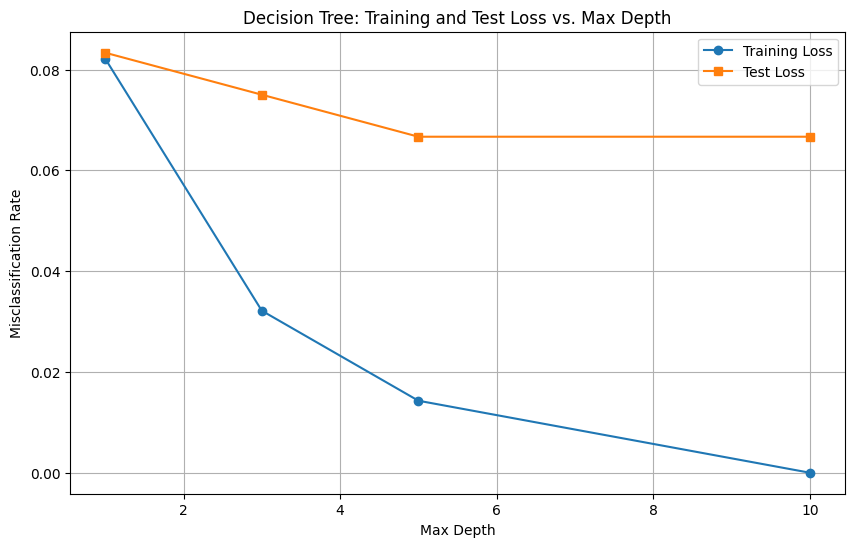

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('./w3classif.csv', header=None, names=['X', 'Y', 'label'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X', 'Y']]
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different maximum depth values to experiment with
max_depth_values = [1, 3, 5, 10, None]

# Store the results
results = []

for max_depth in max_depth_values:
    # Create a decision tree classifier with current max_depth
    tree_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Train the classifier
    tree_classifier.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = tree_classifier.predict(X_train)
    y_test_pred = tree_classifier.predict(X_test)

    # Calculate misclassification rate for training and testing sets
    train_loss = 1 - accuracy_score(y_train, y_train_pred)
    test_loss = 1 - accuracy_score(y_test, y_test_pred)

    # Store the results
    results.append((max_depth, train_loss, test_loss))

    print(f'max_depth={max_depth}')
    print(f'Training Loss (Misclassification Rate): {train_loss:.4f}')
    print(f'Test Loss (Misclassification Rate): {test_loss:.4f}')

    # Plot decision regions
    h = .02  # step size in the mesh
    x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
    y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
    plt.scatter(X_train['X'], X_train['Y'], c=y_train, edgecolor='k', marker='o', label='Training Data', cmap=plt.cm.viridis)
    plt.scatter(X_test['X'], X_test['Y'], c=y_test, edgecolor='k', marker='s', label='Testing Data', cmap=plt.cm.viridis)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.title(f'Decision Tree Decision Regions (max_depth={max_depth})', fontsize=16)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.show()

# Plot the loss values for different max_depth values
depth_values, train_losses, test_losses = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_losses, label='Training Loss', marker='o')
plt.plot(depth_values, test_losses, label='Test Loss', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Rate')
plt.title('Decision Tree: Training and Test Loss vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

### Q6

(a) Build a decision tree regression model for dataset w3regr.csv and find the training and test loss (i.e. sum of squared error).
(b) Plot the training and/or test data together with the predicted “function” of the model.
(c) Experiment with different maximum depth values and see how it affects the loss values and the predicted function.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('./w3regr.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X']]
y = data['Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor
tree_regressor.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

# Calculate sum of squared error for training and testing sets
train_loss = mean_squared_error(y_train, y_train_pred) * len(y_train)
test_loss = mean_squared_error(y_test, y_test_pred) * len(y_test)

print(f'Training Loss (Sum of Squared Error): {train_loss:.4f}')
print(f'Test Loss (Sum of Squared Error): {test_loss:.4f}')

Training Loss (Sum of Squared Error): 0.0000
Test Loss (Sum of Squared Error): 5616.2315


Training Loss (Sum of Squared Error): 0.0000
Test Loss (Sum of Squared Error): 5616.2315


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


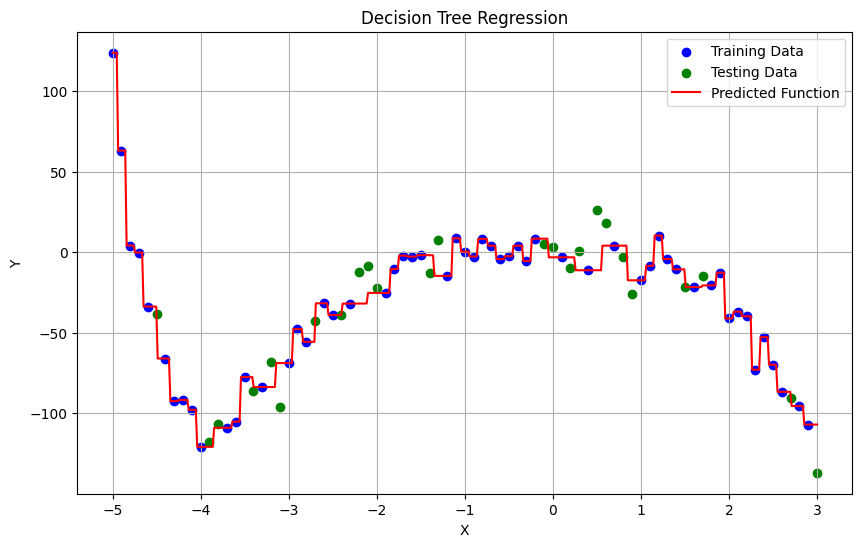

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('./w3regr.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X']]
y = data['Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor
tree_regressor.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

# Calculate sum of squared error for training and testing sets
train_loss = mean_squared_error(y_train, y_train_pred) * len(y_train)
test_loss = mean_squared_error(y_test, y_test_pred) * len(y_test)

print(f'Training Loss (Sum of Squared Error): {train_loss:.4f}')
print(f'Test Loss (Sum of Squared Error): {test_loss:.4f}')

# Plot the training and test data together with the predicted function
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Plot predicted function
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = tree_regressor.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Predicted Function')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Tree Regression')
plt.legend()
plt.grid(True)
plt.show()

max_depth=1
Training Loss (Sum of Squared Error): 81071.1495
Test Loss (Sum of Squared Error): 49944.7263


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


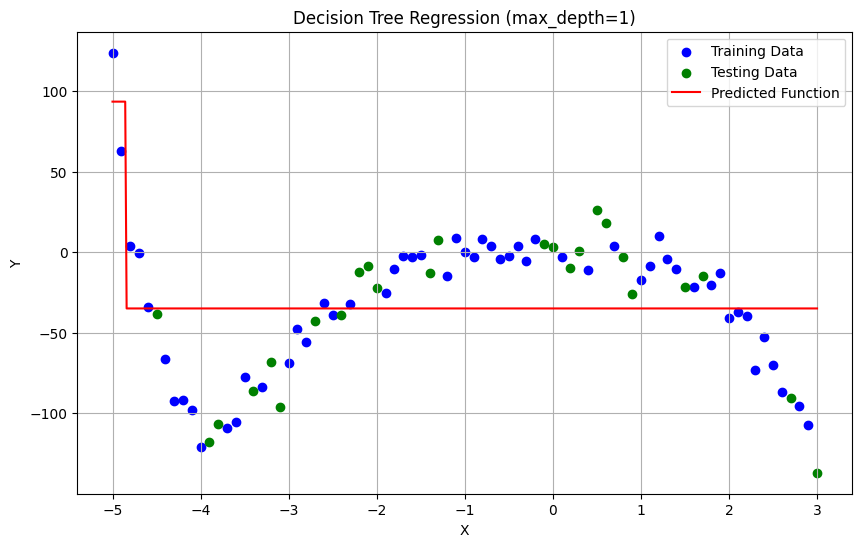

max_depth=3
Training Loss (Sum of Squared Error): 15710.9939
Test Loss (Sum of Squared Error): 12302.4998


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


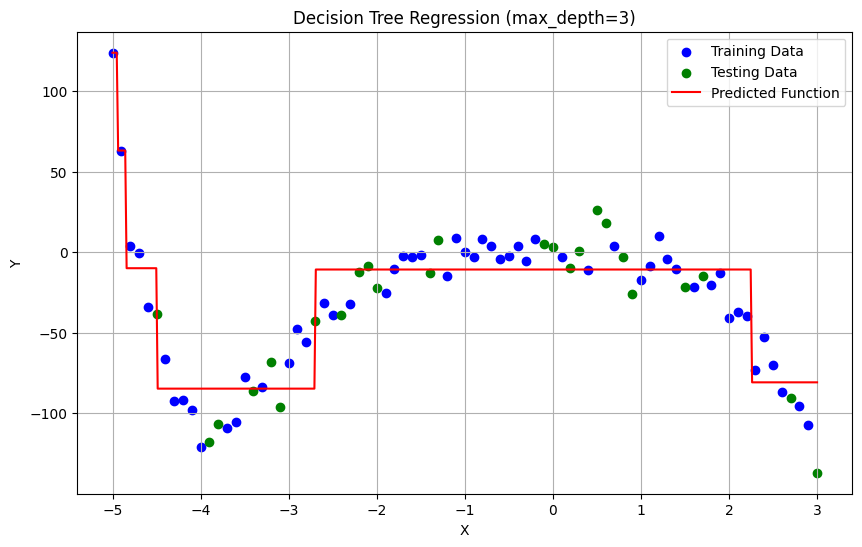

max_depth=5
Training Loss (Sum of Squared Error): 3714.4250
Test Loss (Sum of Squared Error): 7063.0290


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


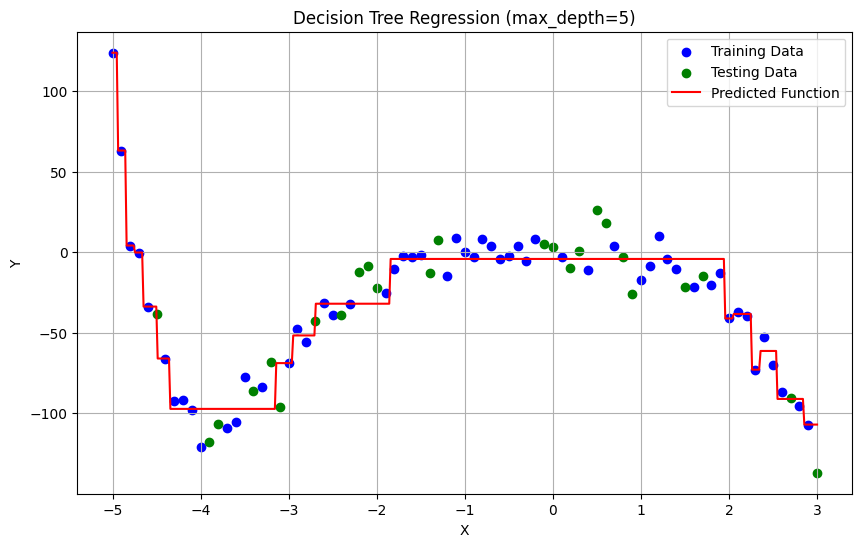

max_depth=10
Training Loss (Sum of Squared Error): 319.5440
Test Loss (Sum of Squared Error): 5282.5571


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


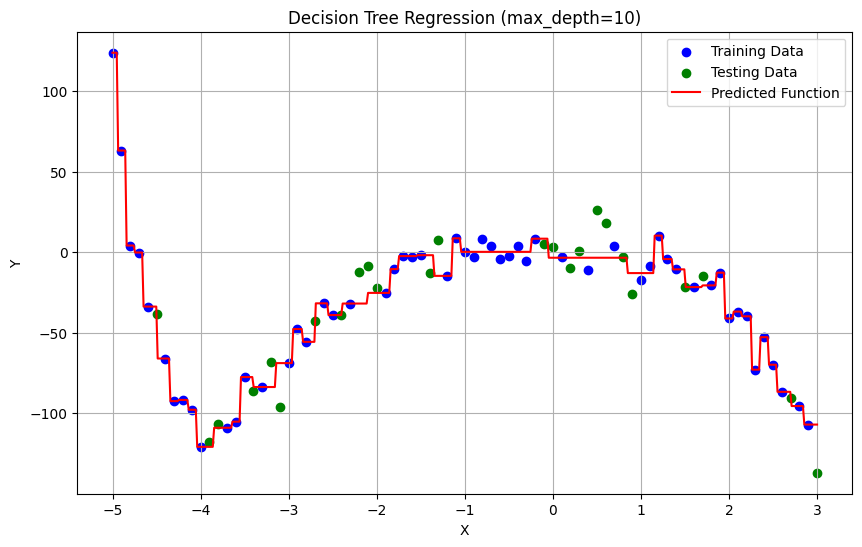

max_depth=None
Training Loss (Sum of Squared Error): 0.0000
Test Loss (Sum of Squared Error): 5616.2315


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


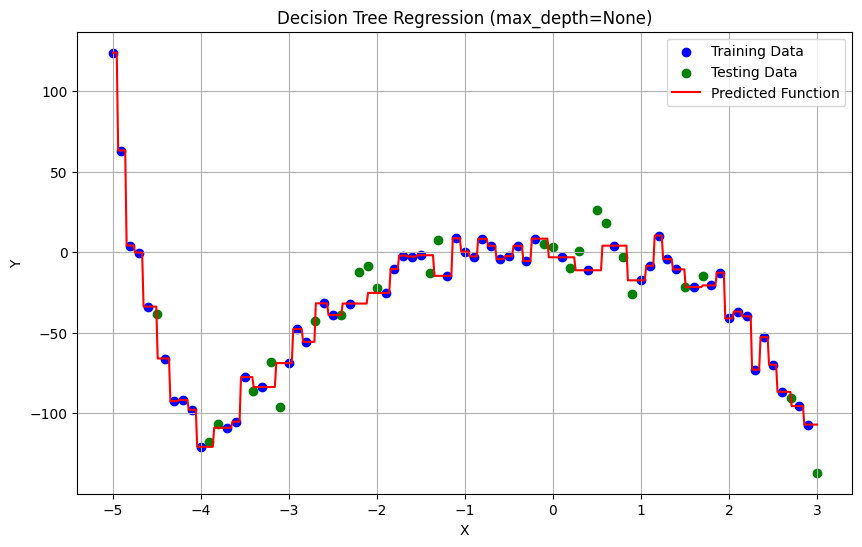

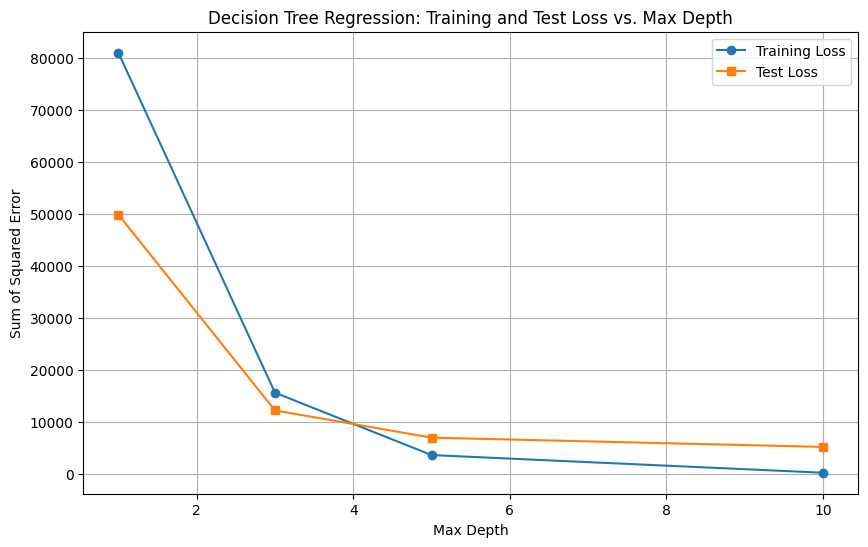

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('./w3regr.csv', header=None, names=['X', 'Y'])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features and labels
X = data[['X']]
y = data['Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different maximum depth values to experiment with
max_depth_values = [1, 3, 5, 10, None]

# Store the results
results = []

for max_depth in max_depth_values:
    # Create a decision tree regressor with current max_depth
    tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Train the regressor
    tree_regressor.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)

    # Calculate sum of squared error for training and testing sets
    train_loss = mean_squared_error(y_train, y_train_pred) * len(y_train)
    test_loss = mean_squared_error(y_test, y_test_pred) * len(y_test)

    # Store the results
    results.append((max_depth, train_loss, test_loss))

    print(f'max_depth={max_depth}')
    print(f'Training Loss (Sum of Squared Error): {train_loss:.4f}')
    print(f'Test Loss (Sum of Squared Error): {test_loss:.4f}')

    # Plot the training and test data together with the predicted function
    plt.figure(figsize=(10, 6))

    # Plot training data
    plt.scatter(X_train, y_train, color='blue', label='Training Data')

    # Plot test data
    plt.scatter(X_test, y_test, color='green', label='Testing Data')

    # Plot predicted function
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_plot = tree_regressor.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red', label='Predicted Function')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Decision Tree Regression (max_depth={max_depth})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the loss values for different max_depth values
depth_values, train_losses, test_losses = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_losses, label='Training Loss', marker='o')
plt.plot(depth_values, test_losses, label='Test Loss', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Sum of Squared Error')
plt.title('Decision Tree Regression: Training and Test Loss vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()